In [97]:
# Import libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Import libraries for working with dates and times
import datetime as dt

# Import TensorFlow and Keras libraries for building and training neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, SimpleRNN, Reshape, Flatten
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l2

# Import scikit-learn library for various metrics and preprocessing tools
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Import matplotlib library for creating plots and charts
import matplotlib.pyplot as plt

# Magic command to display plots inline in the Jupyter Notebook
%matplotlib inline

In [98]:
# Calculate the accuracy of each model
def evaluateModel(test,pred,val,pred_val):
  print('** Testing **')
  test_mae = mean_absolute_error(test, pred)
  print('MAE: ', test_mae)

  test_ape = np.abs((test - pred) / test)
  test_mape = np.mean(test_ape) * 100
  print('MAPE: ', test_mape)

  test_mse = mean_squared_error(test, pred)
  test_rmse = np.sqrt(test_mse)
  print('RMSE: ', test_rmse)

  print('\n** Validate **')
  val_mae = mean_absolute_error(val, pred_val)
  print('MAE: ', val_mae)

  val_ape = np.abs((val - pred_val) / val)
  val_mape = np.mean(val_ape) * 100
  print('MAPE: ', val_mape)

  val_mse = mean_squared_error(val, pred_val)
  val_rmse = np.sqrt(val_mse)
  print('RMSE: ', val_rmse)

In [99]:
# Read in the Gold dataset from a CSV file
df=pd.read_csv("../dataset/cleaned_gc=f.csv")
df=df.set_index(pd.DatetimeIndex(df['Date'].values))


# Preprocessing Data

---

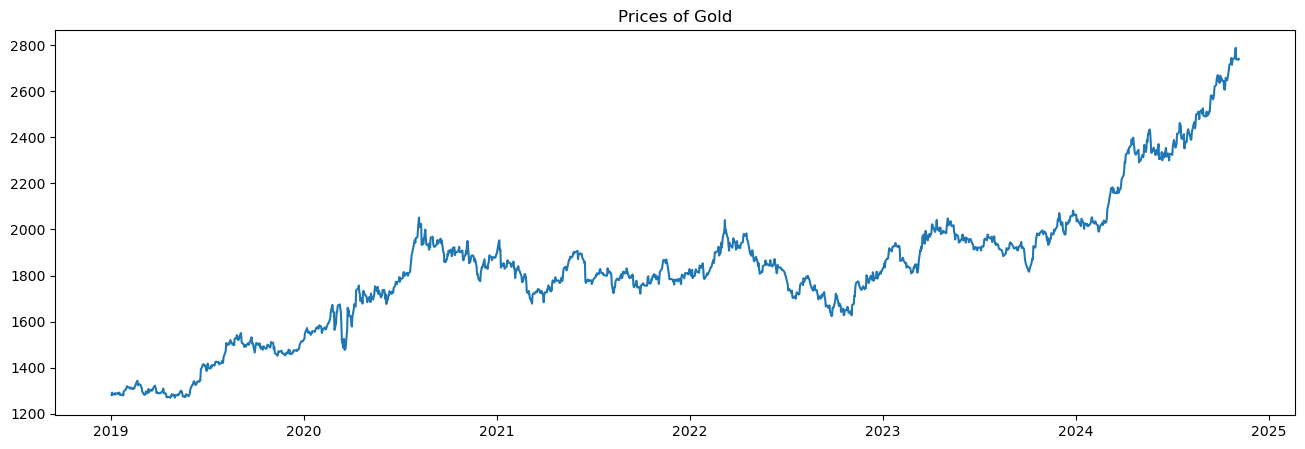

In [100]:
# Format column Date
df.index = pd.to_datetime(df.index,format='%m/%d/%Y')

# Create new Dataframe
df1 = pd.DataFrame(df, columns=['Date', 'Close'])
df1.drop('Date', axis = 1, inplace = True)

# Plot the 'price' column of the 'df' DataFrame
plt.figure(figsize=(16,5))
plt.plot(df1['Close'])
plt.title('Prices of Gold')
plt.show()

# Split dataset (7-2-1)

---



In [101]:
# Create a MinMaxScaler object with a specified range
data = df1.values
sc = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the data and transform the data
sc_train = sc.fit_transform(data)

# Split the data
train_size = int(0.7 * len(sc_train))
test_size = int(0.2 * len(sc_train))
val_size = len(sc_train) - train_size - test_size

train_data = sc_train[:train_size]
test_data = sc_train[train_size:train_size+test_size]
val_data = sc_train[train_size+test_size:]
     

In [102]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [103]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [9]:
# Build the model
model = Sequential()

# Add an LSTM layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an LSTM layer with 50 units
model.add(LSTM(50,return_sequences=True))

# Add an LSTM layer with 50 units
model.add(LSTM(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_7_2_1.keras'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80


c:\Users\yashi\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: loss improved from inf to 0.11586, saving model to save_model_7_2_1.keras
19/19 - 4s - 234ms/step - loss: 0.1159
Epoch 2/80

Epoch 2: loss improved from 0.11586 to 0.03998, saving model to save_model_7_2_1.keras
19/19 - 1s - 55ms/step - loss: 0.0400
Epoch 3/80

Epoch 3: loss improved from 0.03998 to 0.02666, saving model to save_model_7_2_1.keras
19/19 - 1s - 52ms/step - loss: 0.0267
Epoch 4/80

Epoch 4: loss did not improve from 0.02666
19/19 - 1s - 50ms/step - loss: 0.0270
Epoch 5/80

Epoch 5: loss improved from 0.02666 to 0.02458, saving model to save_model_7_2_1.keras
19/19 - 1s - 55ms/step - loss: 0.0246
Epoch 6/80

Epoch 6: loss improved from 0.02458 to 0.02255, saving model to save_model_7_2_1.keras
19/19 - 1s - 52ms/step - loss: 0.0225
Epoch 7/80

Epoch 7: loss improved from 0.02255 to 0.02205, saving model to save_model_7_2_1.keras
19/19 - 1s - 52ms/step - loss: 0.0220
Epoch 8/80

Epoch 8: loss improved from 0.02205 to 0.02165, saving model to save_model_7_2_1.keras


In [104]:
# Transform the y_train array back to the original scale
y_train = sc.inverse_transform(y_train)

# Load the best model from the save_model.keras file
final_model = load_model('save_model_7_2_1.keras')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


In [105]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [106]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [107]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.6991178826071462, 0.6866112997919653, 0.6984596414063471, 0.7138625822664999, 0.6892442645951613, 0.6981964094336652, 0.6893760418505963, 0.6779225481952376, 0.6945760828292709, 0.6966824224180088, 0.6966166950593853, 0.6935887210280722, 0.7178120294712937, 0.7367035196804059, 0.7147840554399809, 0.7180095340853523, 0.7259741558535635, 0.7541469115015789, 0.7534886703007799, 0.7593469524802534, 0.7853474799118132, 0.7803449435471974, 0.7783702199448004, 0.7413112080859987, 0.7390073638832022, 0.7473012675209072, 0.7530279337140395, 0.7126118272235253, 0.7311084694736145, 0.729331250485276, 0.747564499493589, 0.7617166853107673, 0.7673117355175587, 0.7611900600963093, 0.7453922712771337, 0.7370985289085228, 0.7380200020820038, 0.7588862158935128, 0.7654029005428793, 0.7853474799118132, 0.7881779493290677, 0.7702079322934365, 0.7792259657596579, 0.8091759403960117, 0.8112822799847497, 0.81753557139234, 0.8156265751485665, 0.7962084597249965, 0.8156265751485665, 0.821748250569

In [108]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.8594633340835571], [0.7036353945732117], [0.5740857720375061], [0.4978320300579071], [0.4578283727169037], [0.4301726520061493], [0.4033898115158081], [0.3768223226070404], [0.35386422276496887], [0.3372453451156616], [0.3275640904903412], [0.3238823413848877], [0.32472318410873413], [0.32868143916130066], [0.33464330434799194], [0.3418065309524536], [0.3496270179748535], [0.35774698853492737], [0.36592620611190796], [0.3739869296550751], [0.38177490234375], [0.3891400694847107], [0.39593249559402466], [0.40200966596603394], [0.40724873542785645], [0.41155850887298584], [0.4148874282836914], [0.4172252118587494], [0.4186006486415863], [0.41907504200935364]]


In [109]:
# Convert the 'date' column in the dataframe to a list of strings
datelist_train = df['Date'].astype(str).tolist()

# Parse the date strings using strptime(), using the correct format string
datelist_train = [dt.datetime.strptime(date, '%m/%d/%Y').date() for date in datelist_train]

# Generate a list of future dates, starting from the last date in the training data and going for 15 days
datelist_future = pd.date_range(datelist_train[-1], periods=30, freq='1d').tolist()

In [110]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[2574.99670403]
 [2338.26290596]
 [2141.45112575]
 [2025.60644467]
 [1964.8328904 ]
 [1922.81832085]
 [1882.12983089]
 [1841.76850304]
 [1806.89055889]
 [1781.64316077]
 [1766.93539922]
 [1761.34208616]
 [1762.61949439]
 [1768.63287527]
 [1777.69014057]
 [1788.57251407]
 [1800.45339758]
 [1812.78925645]
 [1825.21512339]
 [1837.46097421]
 [1849.29246193]
 [1860.48162349]
 [1870.80067691]
 [1880.03311384]
 [1887.99230791]
 [1894.53971551]
 [1899.59700972]
 [1903.14857041]
 [1905.2381339 ]
 [1905.95883229]]


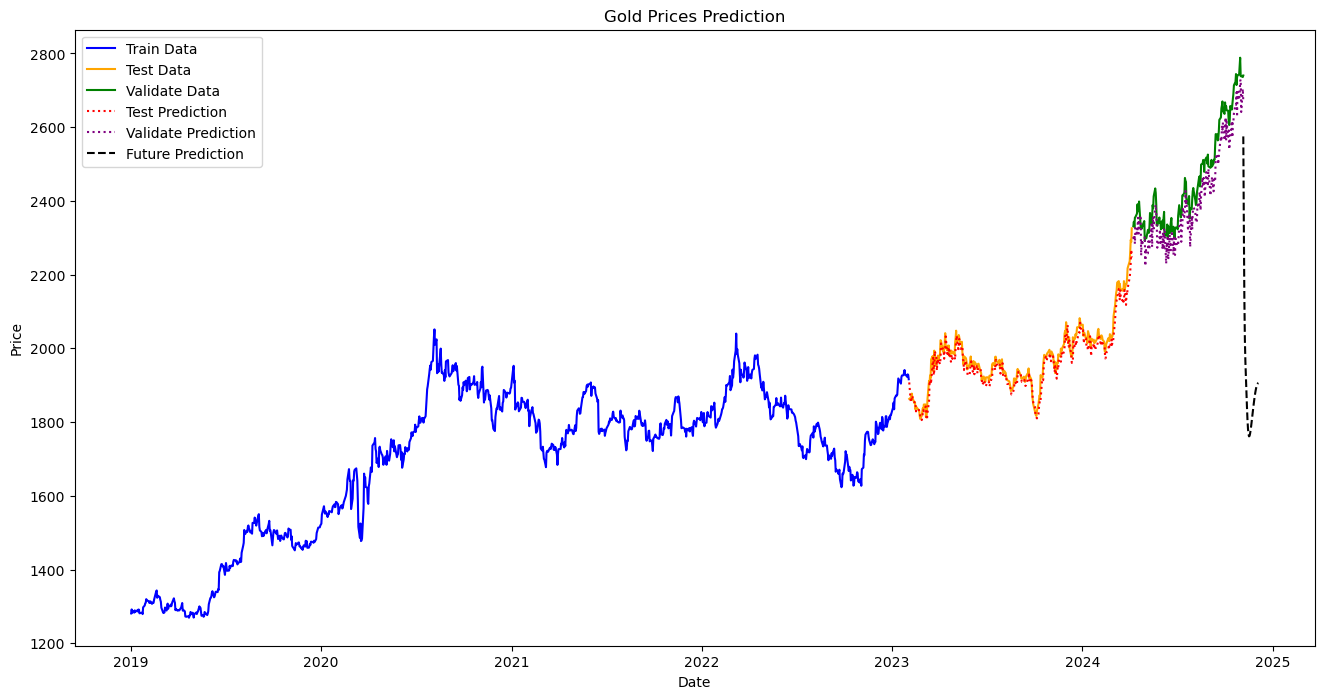

In [112]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['Close']).set_index(pd.Series(datelist_future))

# Split the data into train, test, and validate
train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a plot
plt.figure(figsize=(16, 8))

# Plot the training data
tl, = plt.plot(train_data.index, train_data['Close'], color='blue', label='Train Data')

# Plot the test data (actual values)
tt, = plt.plot(test_data.index, test_data['Close'], color='orange', label='Test Data')

# Plot the validation data (actual values)
vl, = plt.plot(val_data.index, val_data['Close'], color='green', label='Validate Data')

# Plot the test data predictions
tp, = plt.plot(test_data.index, y_test_predict, color='red', linestyle='dotted', label='Test Prediction')

# Plot the validation data predictions
vp, = plt.plot(val_data.index, y_val_predict, color='purple', linestyle='dotted', label='Validate Prediction')

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['Close'], color='black', linestyle='dashed', label='Future Prediction')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Prices Prediction')
plt.legend(handles=[tl, tt, vl, tp, vp, pf])
plt.show()


In [113]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  17.94969083463542
MAPE:  0.8947624193386657
RMSE:  23.00046398114357

** Validate **
MAE:  52.718863817673146
MAPE:  2.130894742320197
RMSE:  58.513073133481285


# Split dataset (6-3-1)

---



In [114]:
# 4. Split data (6-3-1)
train_size = int(0.6 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [115]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [116]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [22]:
# Build the model
model = Sequential()

# Add an LSTM layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an LSTM layer with 50 units
model.add(LSTM(50,return_sequences=True))

# Add an LSTM layer with 50 units
model.add(LSTM(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_6_3_1.keras'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80


c:\Users\yashi\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: loss improved from inf to 0.10610, saving model to save_model_6_3_1.keras
16/16 - 4s - 254ms/step - loss: 0.1061
Epoch 2/80

Epoch 2: loss improved from 0.10610 to 0.03447, saving model to save_model_6_3_1.keras
16/16 - 1s - 63ms/step - loss: 0.0345
Epoch 3/80

Epoch 3: loss improved from 0.03447 to 0.02283, saving model to save_model_6_3_1.keras
16/16 - 1s - 60ms/step - loss: 0.0228
Epoch 4/80

Epoch 4: loss improved from 0.02283 to 0.02260, saving model to save_model_6_3_1.keras
16/16 - 1s - 55ms/step - loss: 0.0226
Epoch 5/80

Epoch 5: loss did not improve from 0.02260
16/16 - 1s - 51ms/step - loss: 0.0231
Epoch 6/80

Epoch 6: loss did not improve from 0.02260
16/16 - 1s - 51ms/step - loss: 0.0238
Epoch 7/80

Epoch 7: loss did not improve from 0.02260
16/16 - 1s - 54ms/step - loss: 0.0234
Epoch 8/80

Epoch 8: loss improved from 0.02260 to 0.02128, saving model to save_model_6_3_1.keras
16/16 - 1s - 52ms/step - loss: 0.0213
Epoch 9/80

Epoch 9: loss improved from 0.02128 to

In [117]:
# Transform the y_train array back to the original scale
y_train = sc.inverse_transform(y_train)

# Load the best model from the save_model.hdf5 file
final_model = load_model('save_model_6_3_1.keras')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


In [118]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [119]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [120]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.6991178826071462, 0.6866112997919653, 0.6984596414063471, 0.7138625822664999, 0.6892442645951613, 0.6981964094336652, 0.6893760418505963, 0.6779225481952376, 0.6945760828292709, 0.6966824224180088, 0.6966166950593853, 0.6935887210280722, 0.7178120294712937, 0.7367035196804059, 0.7147840554399809, 0.7180095340853523, 0.7259741558535635, 0.7541469115015789, 0.7534886703007799, 0.7593469524802534, 0.7853474799118132, 0.7803449435471974, 0.7783702199448004, 0.7413112080859987, 0.7390073638832022, 0.7473012675209072, 0.7530279337140395, 0.7126118272235253, 0.7311084694736145, 0.729331250485276, 0.747564499493589, 0.7617166853107673, 0.7673117355175587, 0.7611900600963093, 0.7453922712771337, 0.7370985289085228, 0.7380200020820038, 0.7588862158935128, 0.7654029005428793, 0.7853474799118132, 0.7881779493290677, 0.7702079322934365, 0.7792259657596579, 0.8091759403960117, 0.8112822799847497, 0.81753557139234, 0.8156265751485665, 0.7962084597249965, 0.8156265751485665, 0.821748250569

In [121]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.8594633340835571], [0.7036353945732117], [0.5740857720375061], [0.4978320300579071], [0.4578283727169037], [0.4301726520061493], [0.4033898115158081], [0.3768223226070404], [0.35386422276496887], [0.3372453451156616], [0.3275640904903412], [0.3238823413848877], [0.32472318410873413], [0.32868143916130066], [0.33464330434799194], [0.3418065309524536], [0.3496270179748535], [0.35774698853492737], [0.36592620611190796], [0.3739869296550751], [0.38177490234375], [0.3891400694847107], [0.39593249559402466], [0.40200966596603394], [0.40724873542785645], [0.41155850887298584], [0.4148874282836914], [0.4172252118587494], [0.4186006486415863], [0.41907504200935364]]


In [123]:
# Convert the 'date' column in the dataframe to a list of strings
datelist_train = df['Date'].astype(str).tolist()


# Parse the date strings using strptime(), using the correct format string
datelist_train = [dt.datetime.strptime(date, '%m/%d/%Y').date() for date in datelist_train]


# Generate a list of future dates, starting from the last date in the training data and going for 15 days
datelist_future = pd.date_range(datelist_train[-1], periods=30, freq='1d').tolist()

In [124]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[2574.99670403]
 [2338.26290596]
 [2141.45112575]
 [2025.60644467]
 [1964.8328904 ]
 [1922.81832085]
 [1882.12983089]
 [1841.76850304]
 [1806.89055889]
 [1781.64316077]
 [1766.93539922]
 [1761.34208616]
 [1762.61949439]
 [1768.63287527]
 [1777.69014057]
 [1788.57251407]
 [1800.45339758]
 [1812.78925645]
 [1825.21512339]
 [1837.46097421]
 [1849.29246193]
 [1860.48162349]
 [1870.80067691]
 [1880.03311384]
 [1887.99230791]
 [1894.53971551]
 [1899.59700972]
 [1903.14857041]
 [1905.2381339 ]
 [1905.95883229]]


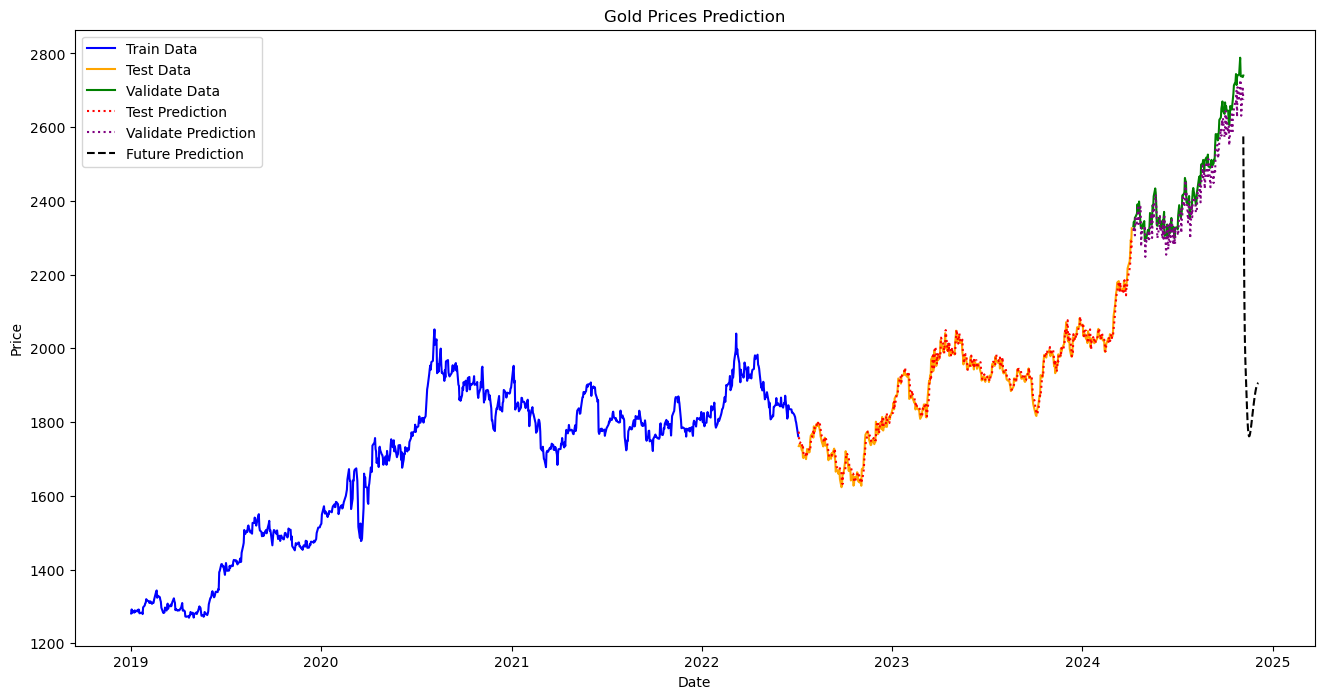

In [125]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['Close']).set_index(pd.Series(datelist_future))

# Split the data into train, test, and validate
train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a plot
plt.figure(figsize=(16, 8))

# Plot the training data
tl, = plt.plot(train_data.index, train_data['Close'], color='blue', label='Train Data')

# Plot the test data (actual values)
tt, = plt.plot(test_data.index, test_data['Close'], color='orange', label='Test Data')

# Plot the validation data (actual values)
vl, = plt.plot(val_data.index, val_data['Close'], color='green', label='Validate Data')

# Plot the test data predictions
tp, = plt.plot(test_data.index, y_test_predict, color='red', linestyle='dotted', label='Test Prediction')

# Plot the validation data predictions
vp, = plt.plot(val_data.index, y_val_predict, color='purple', linestyle='dotted', label='Validate Prediction')

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['Close'], color='black', linestyle='dashed', label='Future Prediction')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Prices Prediction')
plt.legend(handles=[tl, tt, vl, tp, vp, pf])
plt.show()


In [126]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  13.218761352076246
MAPE:  0.6970752379480334
RMSE:  17.446074457234968

** Validate **
MAE:  35.050847229307436
MAPE:  1.4058112265341072
RMSE:  42.04886410483555


# Split dataset (5-3-2)

---



In [127]:
# Split data
train_size = int(0.5 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [128]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [129]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [34]:
# Build the model
model = Sequential()

# Add an LSTM layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an LSTM layer with 50 units
model.add(LSTM(50,return_sequences=True))

# Add an LSTM layer with 50 units
model.add(LSTM(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_5_3_2.keras'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80


c:\Users\yashi\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Epoch 1: loss improved from inf to 0.11255, saving model to save_model_5_3_2.keras
13/13 - 4s - 301ms/step - loss: 0.1126
Epoch 2/80

Epoch 2: loss improved from 0.11255 to 0.03912, saving model to save_model_5_3_2.keras
13/13 - 1s - 53ms/step - loss: 0.0391
Epoch 3/80

Epoch 3: loss improved from 0.03912 to 0.02842, saving model to save_model_5_3_2.keras
13/13 - 1s - 52ms/step - loss: 0.0284
Epoch 4/80

Epoch 4: loss improved from 0.02842 to 0.02797, saving model to save_model_5_3_2.keras
13/13 - 1s - 52ms/step - loss: 0.0280
Epoch 5/80

Epoch 5: loss improved from 0.02797 to 0.02391, saving model to save_model_5_3_2.keras
13/13 - 1s - 52ms/step - loss: 0.0239
Epoch 6/80

Epoch 6: loss did not improve from 0.02391
13/13 - 1s - 50ms/step - loss: 0.0243
Epoch 7/80

Epoch 7: loss improved from 0.02391 to 0.02332, saving model to save_model_5_3_2.keras
13/13 - 1s - 55ms/step - loss: 0.0233
Epoch 8/80

Epoch 8: loss improved from 0.02332 to 0.02241, saving model to save_model_5_3_2.keras


In [130]:
# Transform the y_train array back to the original scale
y_train = sc.inverse_transform(y_train)

# Load the best model from the save_model.hdf5 file
final_model = load_model('save_model_5_3_2.keras')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


In [131]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [132]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [133]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.6991178826071462, 0.6866112997919653, 0.6984596414063471, 0.7138625822664999, 0.6892442645951613, 0.6981964094336652, 0.6893760418505963, 0.6779225481952376, 0.6945760828292709, 0.6966824224180088, 0.6966166950593853, 0.6935887210280722, 0.7178120294712937, 0.7367035196804059, 0.7147840554399809, 0.7180095340853523, 0.7259741558535635, 0.7541469115015789, 0.7534886703007799, 0.7593469524802534, 0.7853474799118132, 0.7803449435471974, 0.7783702199448004, 0.7413112080859987, 0.7390073638832022, 0.7473012675209072, 0.7530279337140395, 0.7126118272235253, 0.7311084694736145, 0.729331250485276, 0.747564499493589, 0.7617166853107673, 0.7673117355175587, 0.7611900600963093, 0.7453922712771337, 0.7370985289085228, 0.7380200020820038, 0.7588862158935128, 0.7654029005428793, 0.7853474799118132, 0.7881779493290677, 0.7702079322934365, 0.7792259657596579, 0.8091759403960117, 0.8112822799847497, 0.81753557139234, 0.8156265751485665, 0.7962084597249965, 0.8156265751485665, 0.821748250569

In [134]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.8594633340835571], [0.7036353945732117], [0.5740857720375061], [0.4978320300579071], [0.4578283727169037], [0.4301726520061493], [0.4033898115158081], [0.3768223226070404], [0.35386422276496887], [0.3372453451156616], [0.3275640904903412], [0.3238823413848877], [0.32472318410873413], [0.32868143916130066], [0.33464330434799194], [0.3418065309524536], [0.3496270179748535], [0.35774698853492737], [0.36592620611190796], [0.3739869296550751], [0.38177490234375], [0.3891400694847107], [0.39593249559402466], [0.40200966596603394], [0.40724873542785645], [0.41155850887298584], [0.4148874282836914], [0.4172252118587494], [0.4186006486415863], [0.41907504200935364]]


In [136]:
# Convert the 'date' column in the dataframe to a list of strings
datelist_train = df['Date'].astype(str).tolist()


# Parse the date strings using strptime(), using the correct format string
datelist_train = [dt.datetime.strptime(date, '%m/%d/%Y').date() for date in datelist_train]


# Generate a list of future dates, starting from the last date in the training data and going for 15 days
datelist_future = pd.date_range(datelist_train[-1], periods=30, freq='1d').tolist()

In [137]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[2574.99670403]
 [2338.26290596]
 [2141.45112575]
 [2025.60644467]
 [1964.8328904 ]
 [1922.81832085]
 [1882.12983089]
 [1841.76850304]
 [1806.89055889]
 [1781.64316077]
 [1766.93539922]
 [1761.34208616]
 [1762.61949439]
 [1768.63287527]
 [1777.69014057]
 [1788.57251407]
 [1800.45339758]
 [1812.78925645]
 [1825.21512339]
 [1837.46097421]
 [1849.29246193]
 [1860.48162349]
 [1870.80067691]
 [1880.03311384]
 [1887.99230791]
 [1894.53971551]
 [1899.59700972]
 [1903.14857041]
 [1905.2381339 ]
 [1905.95883229]]


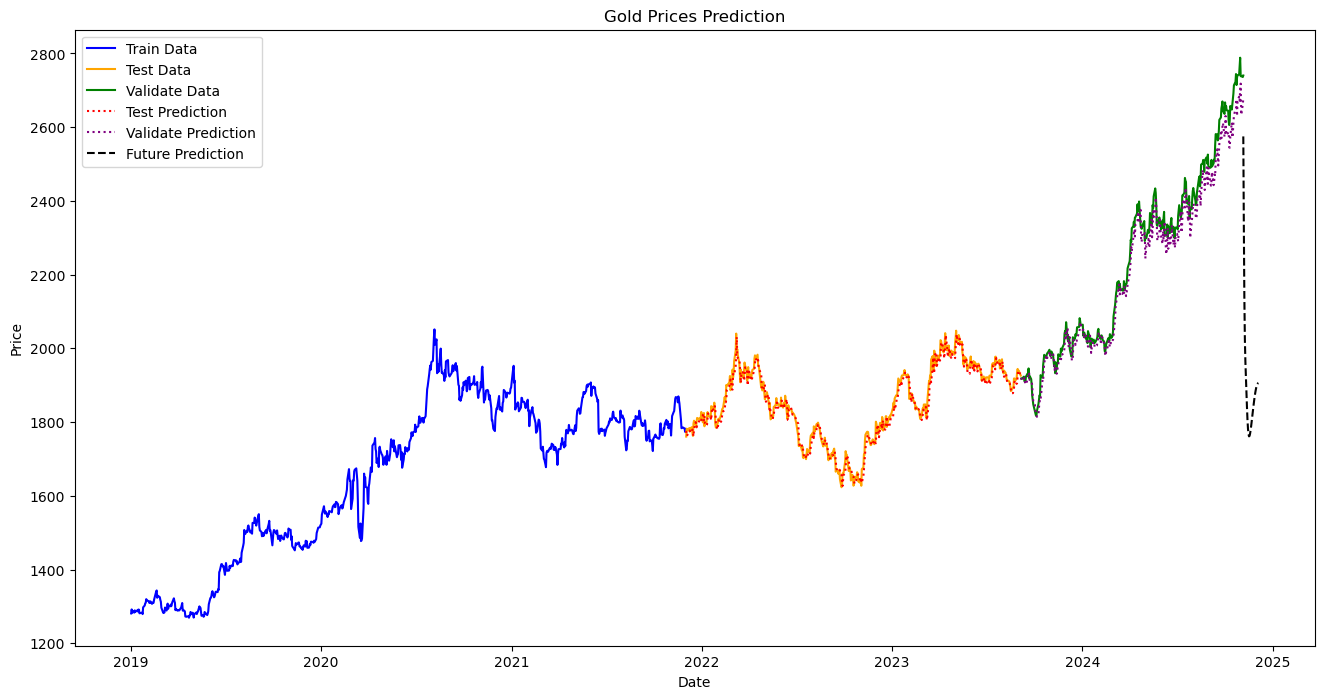

In [139]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['Close']).set_index(pd.Series(datelist_future))

# Split the data into train, test, and validate
train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a plot
plt.figure(figsize=(16, 8))

# Plot the training data
tl, = plt.plot(train_data.index, train_data['Close'], color='blue', label='Train Data')

# Plot the test data (actual values)
tt, = plt.plot(test_data.index, test_data['Close'], color='orange', label='Test Data')

# Plot the validation data (actual values)
vl, = plt.plot(val_data.index, val_data['Close'], color='green', label='Validate Data')

# Plot the test data predictions
tp, = plt.plot(test_data.index, y_test_predict, color='red', linestyle='dotted', label='Test Prediction')

# Plot the validation data predictions
vp, = plt.plot(val_data.index, y_val_predict, color='purple', linestyle='dotted', label='Validate Prediction')

# Plot the future predictions
pf, = plt.plot(PREDICTIONS_FUTURE.index, PREDICTIONS_FUTURE['Close'], color='black', linestyle='dashed', label='Future Prediction')

# Add labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Gold Prices Prediction')
plt.legend(handles=[tl, tt, vl, tp, vp, pf])
plt.show()


In [140]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  14.448909854343817
MAPE:  0.7785689716761648
RMSE:  18.739297767633058

** Validate **
MAE:  31.151975444385602
MAPE:  1.3241080421168334
RMSE:  39.29235243358279
